In [1]:
import sys, os
sys.path.append("../")
from numpy import *
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from Optimisation import HSS
from Trajectory import Point_Lander_Drag

/usr/lib/python2.7/dist-packages/matplotlib/__init__.py:874: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


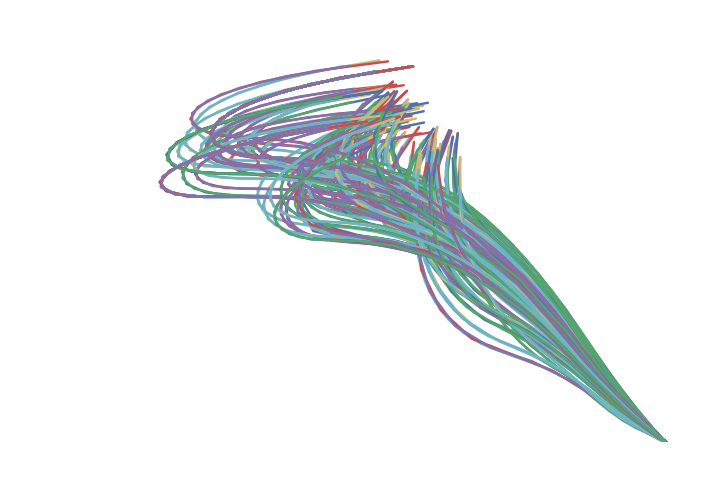

In [2]:
model = Point_Lander_Drag()
directory = "../Data/Mars/"
files = os.listdir(directory)
plt.close('all')

# Collect the state, control, and time index
data = empty((0, model.sdim + model.cdim + 1))

for f in files:
    if "HSS_10_" in f:
        
        # Get the data!
        prob = HSS(model, nsegs=10)
        z = load(directory + f)
        tf, sb, cb, s, c = prob.Decode(z)
        sb = sb[1:]
        cb = cb[1:]
        t = linspace(0,tf,11)
        tb = t[1:]
        
        # Trajectory
        #plt.figure(1)
        plt.plot(s[:,0], s[:,1])
        plt.plot(sb[:,0], sb[:,1])
        
        # Data Collection!
        t    = t.reshape((len(t), 1))
        tb   = tb.reshape((len(tb), 1))
        d    = hstack((s, c, t))
        db   = hstack((sb, cb, tb))
        data = vstack((data, d))
        data = vstack((data, db))
        
    if "HSS_20" in f:
        # Get the data!
        prob = HSS(model, nsegs=20)
        z = load(directory + f)
        tf, sb, cb, s, c = prob.Decode(z)
        t = linspace(0, tf, 21)
        tb = t[1:]
        sb = sb[1:]
        cb = cb[1:]
        
        # Trajectory
        #plt.figure(1)
        plt.plot(s[:,0], s[:,1])
        plt.plot(sb[:,0], sb[:,1])
        
        # Data Collection!
        t    = t.reshape((len(t), 1))
        tb   = tb.reshape((len(tb), 1))
        d    = hstack((s, c, t))
        db   = hstack((sb, cb, tb))
        data = vstack((data, d))
        data = vstack((data, db))
plt.xlabel("Cross-Range [m]")
plt.ylabel("Altitude [m]")
plt.axes().set_aspect('equal', 'datalim')
plt.axis('off')
#plt.savefig("../Data/Figs/Mars_Traj_Far.svg", format='svg',transparent=True, bbox_inches='tight')
plt.show()

# Create a data frame!
df = pd.DataFrame(data, columns=["$x~[m]$", "$y~[m]$", "$v_x~[m/s]$ ", "$v_y~[m/s]$", "$m~[kg]$", "$u$", "$\\theta~[rad]$", "$t~[sec]$"])
#save("../Data/ML/Mars_Far", data)

In [17]:
data = data[:, [0,1,2,3,4]]
data[[0,len(data)/2,-1]]

array([[-3003.20255298,  3610.03013931,   -75.5395321 ,   -65.83635707,
         7525.01646505],
       [-4021.18149083,  3710.3305033 ,  -114.40904341,   -32.72018816,
         7764.81749097],
       [  -11.89780765,     8.27973773,    12.63983686,    -8.92072402,
         6305.31559359]])

In [ ]:
import seaborn as sns
plt.close('all')
sns.set(style="white")

g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)
plt.savefig("../Data/Figs/Mars_Dist_Far.png", format='png',transparent=True, bbox_inches='tight')

In [ ]:
plt.close('all')
from pandas.tools.plotting import table
ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, df.describe())  # where df is your data frame

plt.savefig("../Data/Figs/Mars_Far_Table.svg", format='svg',transparent=True, bbox_inches='tight')

In [ ]:
from sklearn.cross_decomposition import PLSRegression
x = data[:,[0,1,2,3,4]]
y = data[:,[5,6]]

y1 = PLSRegression(1).fit(x,y).predict(x)
y2 = PLSRegression(2).fit(x,y).predict(x)
y3 = PLSRegression(3).fit(x,y).predict(x)

In [ ]:
plt.close('all')

ax1 = plt.subplot(321)
plt.plot(y[:,0], 'k.')
plt.plot(y1[:,0], '.')
plt.ylabel("Throttle (1 Latent)")

ax2 = plt.subplot(322)
plt.plot(y[:,1], 'k.')
plt.plot(y1[:,1], '.')
plt.ylabel("Thrust Angle [rad]")

plt.subplot(323, sharex=ax1, sharey=ax1)
plt.plot(y[:,0], 'k.')
plt.plot(y2[:,0], '.')
plt.ylabel("Throttle (2 Latent)")

plt.subplot(324, sharex=ax2, sharey=ax2)
plt.plot(y[:,1], 'k.')
plt.plot(y2[:,1], '.')
plt.ylabel("Thrust Angle [rad]")

plt.subplot(325, sharex=ax1, sharey=ax1)
plt.plot(y[:,0], 'k.')
plt.plot(y3[:,0], '.')
plt.ylabel("Throttle (3 Latent)")

plt.subplot(326, sharex=ax2, sharey=ax2)
plt.plot(y[:,1], 'k.')
plt.plot(y3[:,1], '.')
plt.ylabel("Thrust Angle [rad]")

plt.savefig("../Data/Figs/PLS.pdf", format='pdf',transparent=True, bbox_inches='tight')
plt.show()


In [6]:
model = Point_Lander_Drag()
directory = "../Data/Mars/"
files = os.listdir(directory)
plt.close('all')

# Collect the state, control, and time index
data2 = empty((0, model.sdim + model.cdim + 1))

for f in files:
    if "HSS_10A_" in f:
        
        # Get the data!
        prob = HSS(model, nsegs=10)
        z = load(directory + f)
        tf, sb, cb, s, c = prob.Decode(z)
        sb = sb[1:]
        cb = cb[1:]
        t = linspace(0,tf,11)
        tb = t[1:]
        
        # Trajectory
        plt.figure(1)
        plt.plot(s[:,0], s[:,1])
        plt.plot(sb[:,0], sb[:,1])
        
        # Data Collection!
        t    = t.reshape((len(t), 1))
        tb   = tb.reshape((len(tb), 1))
        d    = hstack((s, c, t))
        db   = hstack((sb, cb, tb))
        data2 = vstack((data2, d))
        data2 = vstack((data2, db))
        
plt.xlabel("Cross-Range [m]")
plt.ylabel("Altitude [m]")
#plt.savefig
#plt.axis('off')
#plt.savefig("../Data/Figs/Mars_Traj_Close.svg", format='svg',transparent=True, bbox_inches='tight')
 
# Create a data frame!
df = pd.DataFrame(data2, columns=["$x~[m]$", "$y~[m]$", "$v_x~[m/s]$ ", "$v_y~[m/s]$", "$m~[kg]$", "$u$", "$\\theta~[rad]$", "$t~[sec]$"])
#save("../Data/ML/Mars_Close", data2)

# erg... set the wrong intial state boundary, need to prune

In [19]:
data2 = data2[:, [0,1,2,3,4]]
data2[[0, len(data2)/4, -1]]

array([[ -243.53707153,  4296.31407193,  -142.61335252,  -119.98680334,
         6675.1642641 ],
       [-1294.40328521,  2037.01427177,    55.51598959,   -62.51698019,
         6341.85177689],
       [  -38.18822564,    22.58251099,    24.14829986,   -15.04262069,
         5911.67741276]])

In [ ]:
import seaborn as sns
plt.close('all')
sns.set(style="white")

g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)
plt.savefig("../Data/Figs/Mars_Dist_Close.png", format='png',transparent=True, bbox_inches='tight')

/usr/lib/python2.7/dist-packages/matplotlib/__init__.py:894: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [ ]:
plt.close('all')
ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, df.describe())  # where df is your data frame

plt.savefig("../Data/Figs/Mars_Close_Table.svg", format='svg',transparent=True, bbox_inches='tight')

In [ ]:
istates = load("../Data/Point_Lander_Mars_Initial_States.npy")

In [ ]:
dfis = pd.DataFrame(istates, columns=["$x~[m]$", "$y~[m]$", "$v_x~[m/s]$ ", "$v_y~[m/s]$", "$m~[kg]$"])

In [ ]:
g = sns.PairGrid(dfis, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

In [ ]:
plt.show()

In [ ]:
g.savefig("../Data/Figs/Mars_SI_Close.pdf", format='pdf',transparent=True, bbox_inches='tight')